# Proyecto PixelSounds

In [1]:
import imagen2audio as i2a
import cv2
import os
import numpy as np
import warnings
import scipy.fftpack as fft
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d, median_filter
from scipy import signal
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    import vozyaudio as vz

In [2]:
img = "images/lena.png"
img2 = "images/patxirisu.jpg"

### Extracción de canales

In [3]:
R, G, B = i2a.extract_rgb(img)
r,g,b = i2a.extract_rgb(img2)
# plt.figure(figsize=(20, 4))
# plt.subplot(131)
# _ = plt.imshow(R, cmap="Reds")
# plt.subplot(132)
# _ = plt.imshow(G, cmap="Greens")
# plt.subplot(133)
# _ = plt.imshow(B, cmap="Blues")

In [4]:
Y, cB, cR = i2a.extract_ycbcr(img)
y, cb, cr = i2a.extract_ycbcr(img2)
# plt.figure(figsize=(20, 4))
# plt.subplot(131)
# _ = plt.imshow(Y, cmap="Greys")
# plt.subplot(132)
# _ = plt.imshow(cB, cmap="cool")
# plt.subplot(133)
# _ = plt.imshow(cR, cmap="magma")

In [5]:
dur, amp, desv = i2a.mapeo_color(R,G,B,16000,10)
#x = i2a.imagen_a_audio_dft(Y,16000,0.5,10)
y = i2a.imagen_a_audio_dct(R,16000,0.5,10,dur=dur,amp=amp,desv=desv)
y1 = i2a.imagen_a_audio_dct(g,16000,0.5,10,dur=dur,amp=amp,desv=desv)

In [6]:
#s = x+y
vz.sonido(y,16000)
vz.sonido(y1,16000)

### Histograma

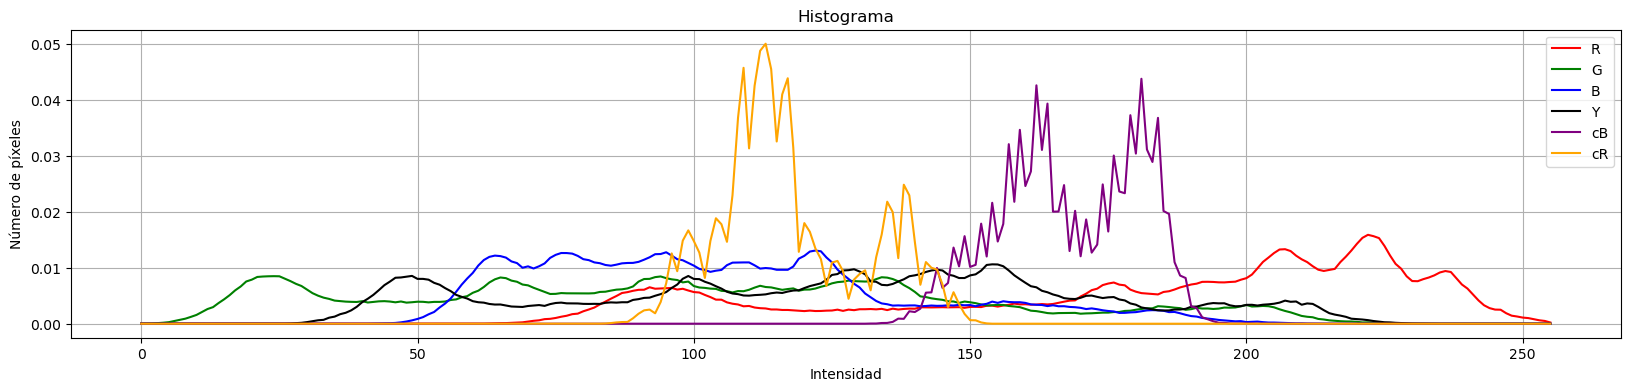

In [7]:
hist_r = i2a.histograma(R)
hist_g = i2a.histograma(G)
hist_b = i2a.histograma(B)
hist_y = i2a.histograma(Y)
hist_cb = i2a.histograma(cB)
hist_cr = i2a.histograma(cR)

intensidad = range(0,256)
plt.figure(figsize=(20, 4))
plt.plot(intensidad,hist_r,"r",label="R")
plt.plot(intensidad,hist_g,"g",label="G")
plt.plot(intensidad,hist_b,"b",label="B")
plt.plot(intensidad,hist_y,"k",label="Y")
plt.plot(intensidad,hist_cb,"purple",label="cB")
plt.plot(intensidad,hist_cr,"orange",label="cR")
plt.title('Histograma')
plt.xlabel('Intensidad')
plt.ylabel('Número de píxeles')
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [8]:
x_vib = i2a.mapeo_histograma(hist_r,x,16000)
vz.sonido(x_vib,16000)

### Gradiente

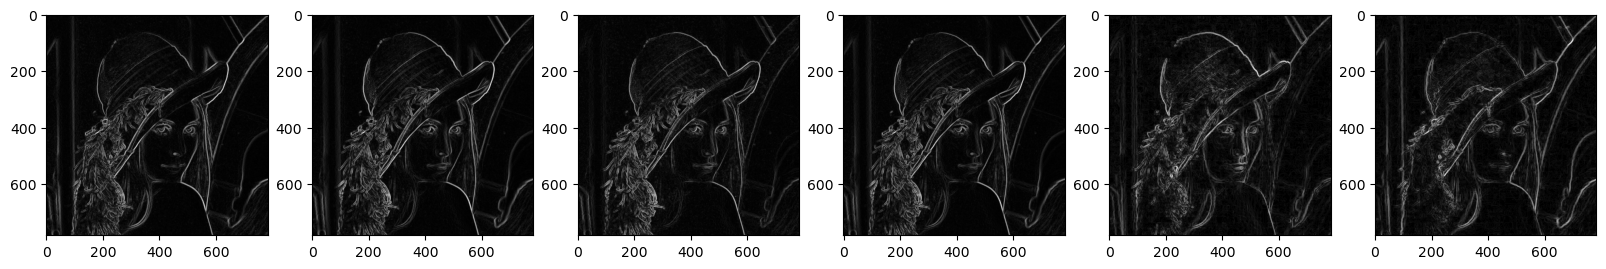

In [9]:
gradiente_r = i2a.gradiente(R)
gradiente_g = i2a.gradiente(G)
gradiente_b = i2a.gradiente(B)
gradiente_y = i2a.gradiente(Y)
gradiente_cb = i2a.gradiente(cB)
gradiente_cr = i2a.gradiente(cR)

plt.figure(figsize=(20, 7))
plt.subplot(161)
_ = plt.imshow(gradiente_r, cmap="Greys")
plt.subplot(162)
_ = plt.imshow(gradiente_g, cmap="Greys")
plt.subplot(163)
_ = plt.imshow(gradiente_b, cmap="Greys")
plt.subplot(164)
_ = plt.imshow(gradiente_y, cmap="Greys")
plt.subplot(165)
_ = plt.imshow(gradiente_cb, cmap="Greys")
plt.subplot(166)
_ = plt.imshow(gradiente_cr, cmap="Greys")

In [10]:
coef_fir = i2a.mapeo_gradiente(gradiente_g,False)
audio_filtrado = signal.lfilter(coef_fir,1, y)
vz.sonido(audio_filtrado,16000)

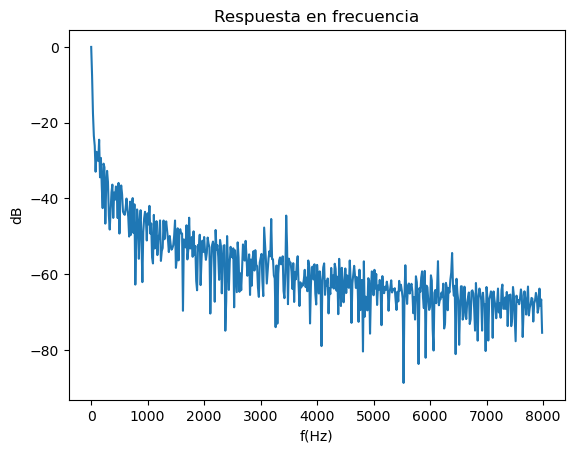

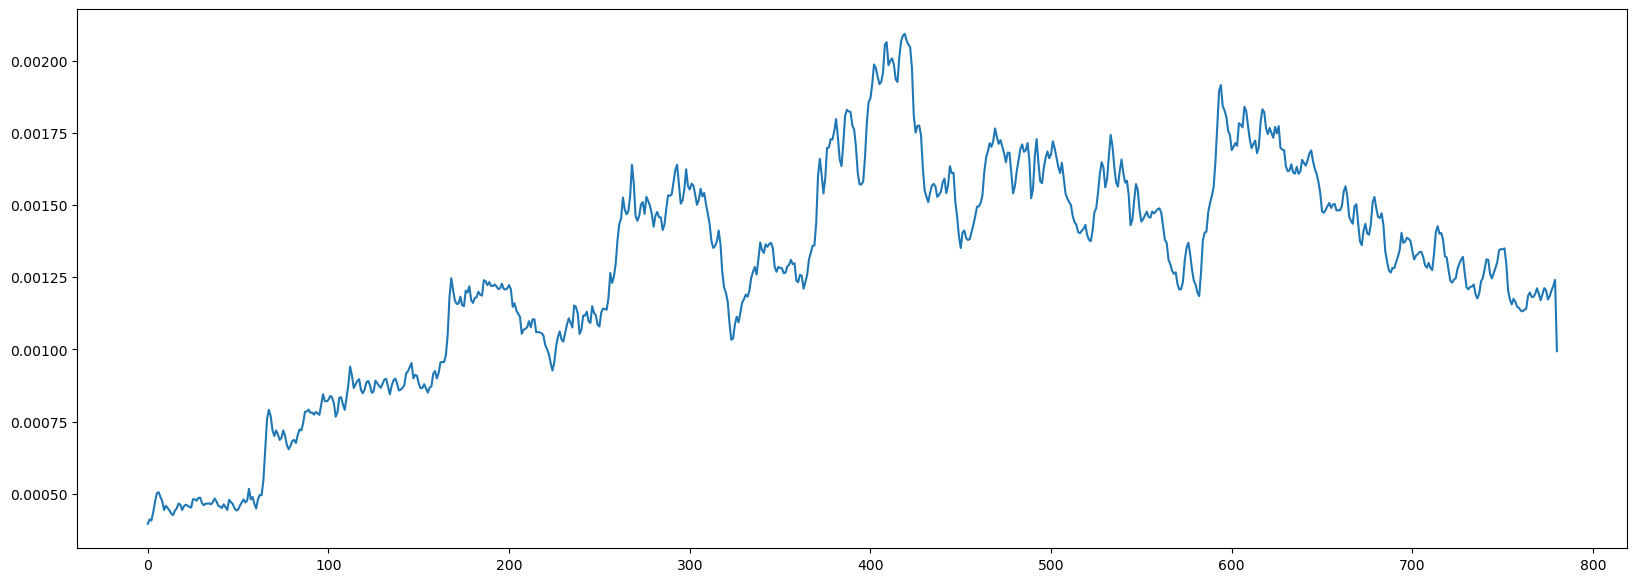

In [11]:
fa,G0=signal.freqz(coef_fir,fs=16000)        # Calculamos su respuesta en frecuencia
plt.plot(fa,20*np.log10(np.abs(G0)))
plt.xlabel('f(Hz)')
plt.ylabel('dB')
plt.title('Respuesta en frecuencia');

plt.figure(figsize=(20,7))
plt.plot(coef_fir)


### Entropía

In [12]:
entropia_r = i2a.entropia(R)
entropia_g = i2a.entropia(G)
entropia_b = i2a.entropia(B)
entropia_y = i2a.entropia(Y)
entropia_cb = i2a.entropia(cB)
entropia_cr = i2a.entropia(cR)

print("Entropia del canal R =",entropia_r)
print("Entropia del canal G =",entropia_g)
print("Entropia del canal B =",entropia_b)
print("Entropia del canal Y =",entropia_y)
print("Entropia del canal cB =",entropia_cb)
print("Entropia del canal cR =",entropia_cr)

Entropia del canal R = 7.244649
Entropia del canal G = 7.575946
Entropia del canal B = 6.9400673
Entropia del canal Y = 7.4309196
Entropia del canal cB = 5.5043097
Entropia del canal cR = 5.529338


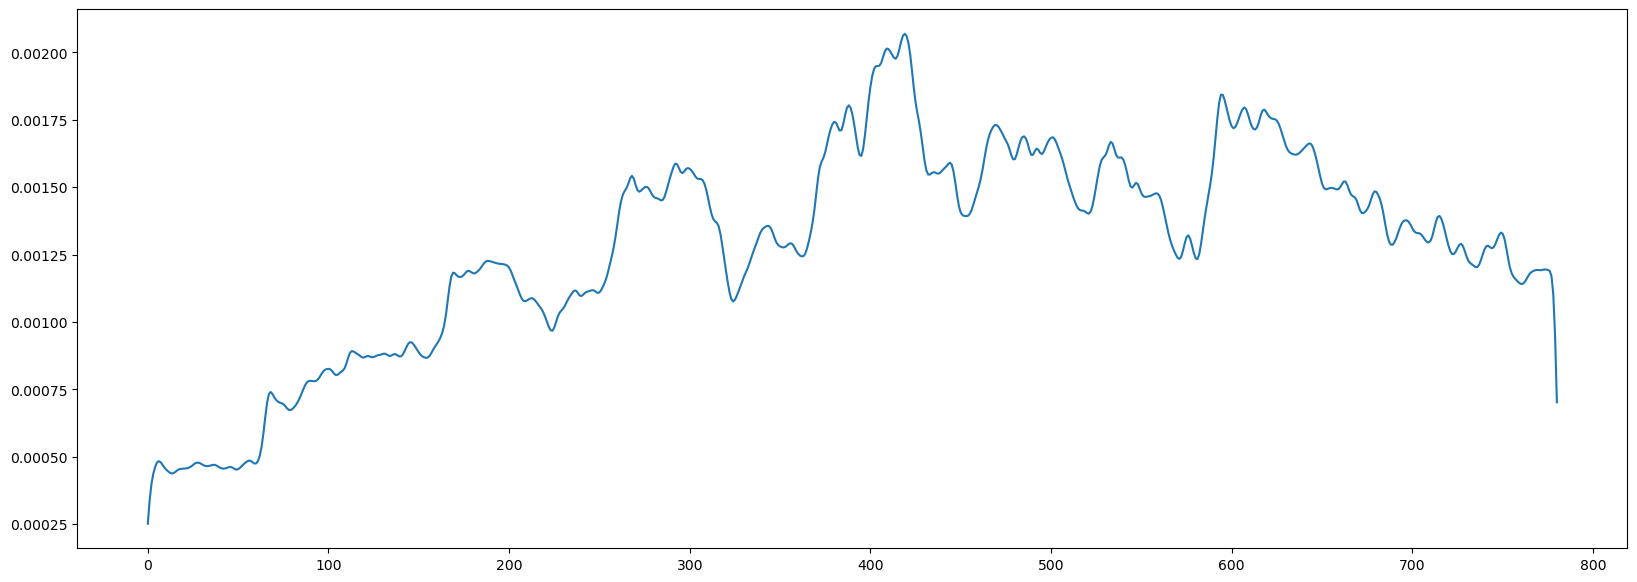

In [13]:
coefs_suav = i2a.mapeo_entropia(coef_fir,entropia_y)
plt.figure(figsize=(20,7))
plt.plot(coefs_suav)

### LBP

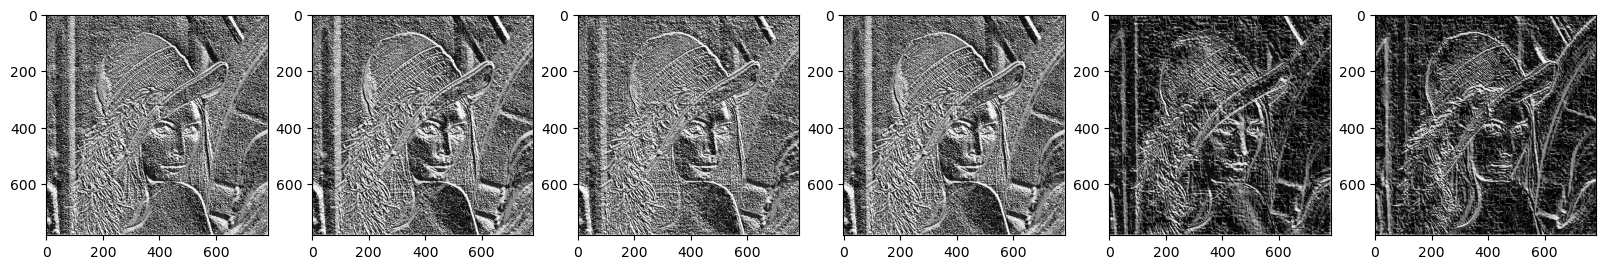

In [15]:
LBP_r = i2a.LBP(R)
LBP_g = i2a.LBP(G)
LBP_b = i2a.LBP(B)
LBP_y = i2a.LBP(Y)
LBP_cb = i2a.LBP(cB)
LBP_cr = i2a.LBP(cR)

plt.figure(figsize=(20, 7))
plt.subplot(161)
_ = plt.imshow(LBP_r, cmap="Greys")
plt.subplot(162)
_ = plt.imshow(LBP_g, cmap="Greys")
plt.subplot(163)
_ = plt.imshow(LBP_b, cmap="Greys")
plt.subplot(164)
_ = plt.imshow(LBP_y, cmap="Greys")
plt.subplot(165)
_ = plt.imshow(LBP_cb, cmap="Greys")
plt.subplot(166)
_ = plt.imshow(LBP_cr, cmap="Greys")

In [22]:
print(i2a.entropia(LBP_cr))

4.5520186
